In [ ]:
!nvidia-smi

Sun Oct  8 12:05:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10, validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1474 - accuracy: 0.9542 - val_loss: 0.0545 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0492 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0301 - val_accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.0271 - val_accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0361 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0250 - val_accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0296 - val_accuracy

313/313 [==============================] - 1s 2ms/step


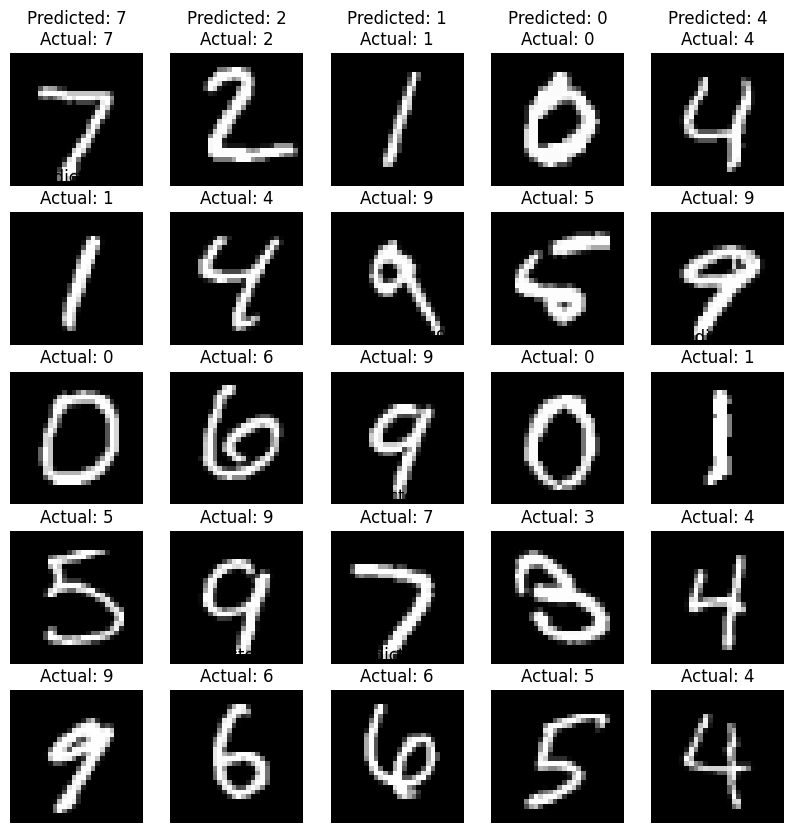

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

# Convert the raw predictions to class labels (0 to 9)
predicted_labels = np.argmax(predictions, axis=1)

# Display some sample predictions along with the actual labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {test_labels[i]}")
    plt.axis('off')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model with dropout layers
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(10)
# ])

# Define the CNN model with more layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Added a dense layer with 128 units
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),  # Added another dense layer with 64 units
    layers.Dropout(0.5),
    layers.Dense(10)
])

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)  # You can adjust the learning rate as needed
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model and collect the training history
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10, validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))

# Plot the training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Make predictions on the test data
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

# Convert the raw predictions to class labels (0 to 9)
predicted_labels = np.argmax(predictions, axis=1)

# Display some sample predictions along with the actual labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {test_labels[i]}")
    plt.axis('off')

plt.show()


Epoch 1/10
 359/1875 [====>.........................] - ETA: 5s - loss: 1.2110 - accuracy: 0.5818

KeyboardInterrupt: ignored